In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random

In [16]:
def generate_maze(size):
    base = np.zeros((size,size))
    base[:,0] = 1
    base[0,:] = 1
    base[-1,:] = 1
    base[:,-1] = 1
    return base

In [153]:
def choose_random_square_from_maze(maze):
    x, y = random.randint(1, maze.shape[0]-2),random.randint(1, maze.shape[0]-2)
    return [x,y]

In [47]:
def add_random_exit(maze):
    x, y = choose_random_square_from_maze(maze)
    maze[x, y] = 2
    return maze

In [50]:
def add_robot(maze):
    x, y = choose_random_square_from_maze(maze)

    maze[x, y] = 3
    return maze

In [54]:
def setup(mazeSize):
    maze = generate_maze(mazeSize)
    maze = add_random_exit(maze)
    maze = add_robot(maze)
    return maze

In [110]:
def display_maze(maze):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    im = ax.pcolor(maze)
    plt.show(block=False)
    for i in range(10):
        sleep(1)
        plt.close()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.pcolor(setup(3))
        plt.show(block=False)

In [113]:
directions = ["left", "right", "up", "down"]

In [173]:
class Maze:
    
    def __init__(self,size):
        self.maze = generate_maze(size)
        self.exitPos = choose_random_square_from_maze(self.maze)
        self.robotPos = self.choose_spot_for_robot()
        self.maze[self.exitPos[0], self.exitPos[1]] = 2
        self.maze[self.robotPos[0], self.robotPos[1]] = 3
        
    def choose_spot_for_robot(self):
        x, y = choose_random_square_from_maze(self.maze)
        while self.maze[x,y] != 0:
            x, y = choose_random_square_from_maze(self.maze)
        return [x,y]
    
    def point_in_direction(self,direction):
        if direction == "left":
            return [self.exitPos[0] - 1 , self.exitPos[1]]
        if direction == "right":
            return [self.exitPos[0] + 1 , self.exitPos[1]]
        if direction == "up":
            return [self.exitPos[0], self.exitPos[1] + 1]
        if direction == "down":
            return [self.exitPos[0], self.exitPos[1] - 1]
        
    def is_valid_move(self,direction):
        if direction not in directions: return False
        try:
            newX, newY = self.point_in_direction(direction)
            return self.maze[newX, newY] != 1
        except(Exception,e):
            print(e)
            return False
            
    def display(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.pcolor(self.maze)
        plt.show(block=False)

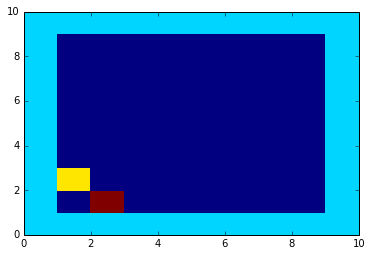

In [174]:
maze = Maze(10)
maze.display()

In [177]:
maze.is_valid_move("down")

2 0


False